# Exercício 2 - Otimização 

In [22]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [15]:
fig = plt.figure(figsize=(13,6))
ax = plt.axes(projection="3d") 
x_vals = np.linspace(-2, 2, 800)
y_vals = np.linspace(-1, 3, 800)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (1 - X)**2 + 100*(Y - X**2)**2
            
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

No handles with labels found to put in legend.


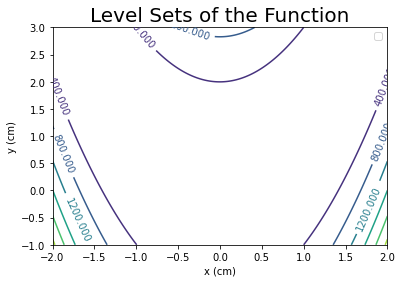

In [5]:
cp = plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)
plt.title('Level Sets of the Function',size=20)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.legend()

In [16]:
Tol = 1.0e-5    
MaxPassos = 50000
x0 = np.zeros((2,1)) 
print(x0)

[[0.]
 [0.]]


In [17]:
def rosenbrock_func(x1,x2):
    return (1 - x1)**2 + 100*(x2 - x1**2)**2
    

In [18]:
def resenbrock_grad(x1,x2):
    dx1 = 2*(200*x1**3 - 200*x1*x2 + x1 - 1)
    dx2 = 200*(x2 - x1**2)        
    return dx1,dx2

In [19]:
print(resenbrock_grad(0,0))



(-2, 0)


In [29]:
def descida_grad(func,func_grad,tol,lr,init,maxpassos,lr_callback = lambda x: x, use_tensor_flow = False):
    
    x0=tf.Variable(init[0])
    x1=tf.Variable(init[1])

    with tf.GradientTape() as tape:
        f_old = func(x0,x1)
    [tf_dx0, tf_dx1]=tape.gradient(f_old,[x0, x1])
    
    if use_tensor_flow :
        dx0=tf_dx0
        dx1=tf_dx1
    else :
        dx0,dx1 = func_grad(init[0],init[1])
    
    x0_next =  init[0] - lr*dx0 
    x1_next =  init[1] - lr*dx1     
    f_new = func(x0_next,x1_next)
    
    step = 0
    while (step < maxpassos) and (abs(f_new - f_old) > tol):
        dx0,dx1 = func_grad(x0_next,x1_next)
        lr = lr_callback(lr)
        x0_next =  x0_next - lr*dx0 
        x1_next =  x1_next - lr*dx1 
        
        f_old = f_new
        f_new = func(x0_next,x1_next)

        step = step + 1
                
        print(x0_next,x1_next)
        
    
    print ("Number of iterations: ", step)
    

In [30]:
descida_grad(rosenbrock_func,resenbrock_grad,Tol,1.e-3,x0,MaxPassos)

[0.72151448]
[0.84988377] [0.72164586]
[0.8499608] [0.72177717]
[0.85003778] [0.72190841]
[0.85011472] [0.72203957]
[0.8501916] [0.72217067]
[0.85026844] [0.72230169]
[0.85034522] [0.72243263]
[0.85042196] [0.7225635]
[0.85049864] [0.7226943]
[0.85057528] [0.72282503]
[0.85065186] [0.72295569]
[0.8507284] [0.72308627]
[0.85080489] [0.72321678]
[0.85088133] [0.72334721]
[0.85095772] [0.72347758]
[0.85103406] [0.72360787]
[0.85111035] [0.72373809]
[0.85118659] [0.72386823]
[0.85126278] [0.72399831]
[0.85133892] [0.72412831]
[0.85141502] [0.72425824]
[0.85149106] [0.7243881]
[0.85156706] [0.72451788]
[0.851643] [0.7246476]
[0.8517189] [0.72477724]
[0.85179475] [0.72490681]
[0.85187055] [0.72503631]
[0.8519463] [0.72516573]
[0.852022] [0.72529508]
[0.85209766] [0.72542437]
[0.85217326] [0.72555358]
[0.85224882] [0.72568271]
[0.85232433] [0.72581178]
[0.85239979] [0.72594078]
[0.8524752] [0.7260697]
[0.85255056] [0.72619855]
[0.85262587] [0.72632733]
[0.85270114] [0.72645604]
[0.85277636] [

In [69]:
descida_grad(rosenbrock_func,resenbrock_grad,Tol,1.e-4,x0,MaxPassos)

521]
[0.70778641] [0.49958279]
[0.70780582] [0.49961037]
[0.70782522] [0.49963794]
[0.70784462] [0.49966551]
[0.70786402] [0.49969308]
[0.70788342] [0.49972065]
[0.70790282] [0.49974822]
[0.70792221] [0.49977578]
[0.70794161] [0.49980334]
[0.707961] [0.4998309]
[0.70798039] [0.49985846]
[0.70799977] [0.49988602]
[0.70801916] [0.49991357]
[0.70803854] [0.49994112]
[0.70805792] [0.49996867]
[0.7080773] [0.49999622]
[0.70809668] [0.50002376]
[0.70811605] [0.5000513]
[0.70813542] [0.50007884]
[0.70815479] [0.50010638]
[0.70817416] [0.50013392]
[0.70819353] [0.50016145]
[0.70821289] [0.50018899]
[0.70823226] [0.50021652]
[0.70825162] [0.50024404]
[0.70827098] [0.50027157]
[0.70829033] [0.5002991]
[0.70830969] [0.50032662]
[0.70832904] [0.50035414]
[0.70834839] [0.50038165]
[0.70836774] [0.50040917]
[0.70838709] [0.50043668]
[0.70840643] [0.5004642]
[0.70842577] [0.50049171]
[0.70844512] [0.50051921]
[0.70846445] [0.50054672]
[0.70848379] [0.50057422]
[0.70850313] [0.50060172]
[0.70852246] [

In [70]:
descida_grad(rosenbrock_func,resenbrock_grad,Tol,1.e-2,x0,MaxPassos)

[0.039568] [0.0008]
[0.05865546] [0.00233125]
[0.07722211] [0.00454967]
[0.09524103] [0.00737683]
[0.11269085] [0.01076487]
[0.12956509] [0.01463358]
[0.1458577] [0.01894064]
[0.16157892] [0.02360829]
[0.17673191] [0.0286072]
[0.1913402] [0.03386113]
[0.2054087] [0.03936101]
[0.21897388] [0.04502445]
[0.23203232] [0.05087467]
[0.24464039] [0.05680332]
[0.25676728] [0.06289451]
[0.26851486] [0.06896436]
[0.27977645] [0.0752361]
[0.29078023] [0.08131362]
[0.30119667] [0.08779266]
[0.3116466] [0.0936462]
[0.32107878] [0.10060101]
[0.33145852] [0.10558216]
[0.33915135] [0.11414734]
[0.35117954] [0.11589993]
[0.35372291] [0.13075421]
[0.37462039] [0.11948559]
[0.35587738] [0.16119528]
[0.4179372] [0.09210215]
[0.29154323] [0.25724086]
[0.50657796] [-0.08724595]
[-0.18033573] [0.60048841]
[-0.56642831] [-0.53544646]
[1.40500217] [1.17712852]
[-3.08169722] [2.77093366]
[79.90898351] [16.22278191]
[-2035754.16826409] [12754.66850897]
[3.37470635e+19] [8.28859005e+12]
[-1.53733302e+59] [2.27772

In [71]:
lr_red = lambda lr: lr*0.999 

descida_grad(rosenbrock_func,resenbrock_grad,Tol,1.e-3,x0,MaxPassos,lr_red)

[0.41021727]
[0.64187293] [0.41026183]
[0.64190745] [0.41030633]
[0.64194193] [0.41035079]
[0.64197636] [0.4103952]
[0.64201076] [0.41043956]
[0.64204512] [0.41048386]
[0.64207944] [0.41052812]
[0.64211372] [0.41057233]
[0.64214796] [0.41061649]
[0.64218216] [0.41066061]
[0.64221632] [0.41070467]
[0.64225044] [0.41074868]
[0.64228452] [0.41079265]
[0.64231856] [0.41083657]
[0.64235256] [0.41088043]
[0.64238652] [0.41092425]
[0.64242044] [0.41096803]
[0.64245432] [0.41101175]
[0.64248817] [0.41105542]
[0.64252197] [0.41109905]
[0.64255574] [0.41114263]
[0.64258946] [0.41118615]
[0.64262315] [0.41122964]
[0.6426568] [0.41127307]
[0.64269041] [0.41131645]
[0.64272398] [0.41135979]
[0.64275751] [0.41140308]
[0.642791] [0.41144632]
[0.64282445] [0.41148951]
[0.64285787] [0.41153266]
[0.64289124] [0.41157575]
[0.64292458] [0.4116188]
[0.64295788] [0.41166181]
[0.64299114] [0.41170476]
[0.64302436] [0.41174767]
[0.64305754] [0.41179053]
[0.64309069] [0.41183334]
[0.64312379] [0.4118761]
[0.64

## 2 Usando _tensorflow_ para calcular o gradiente

A função impementada possui um argumento _use\_tensor\_flow_ que é usado para decidir se o cálculo do gradiente utilizará a função implementada pelo grupo ou a disponível na biblioteca _tensorflow_, sendo assim, basta chamar novamente nossa função de descida de gradiente habilitando esse argumento e utilizando o melhor valor de _learning rate_, no caso, $1 \times 10^-3$


In [78]:
descida_grad(rosenbrock_func,resenbrock_grad,Tol,1.e-3,x0,MaxPassos, lambda x: x ,True)

], shape=(1,), dtype=float64)
tf.Tensor([0.88736128], shape=(1,), dtype=float64) tf.Tensor([0.786928], shape=(1,), dtype=float64)
tf.Tensor([0.88741546], shape=(1,), dtype=float64) tf.Tensor([0.7870244], shape=(1,), dtype=float64)
tf.Tensor([0.88746961], shape=(1,), dtype=float64) tf.Tensor([0.78712076], shape=(1,), dtype=float64)
tf.Tensor([0.88752373], shape=(1,), dtype=float64) tf.Tensor([0.78721707], shape=(1,), dtype=float64)
tf.Tensor([0.88757782], shape=(1,), dtype=float64) tf.Tensor([0.78731333], shape=(1,), dtype=float64)
tf.Tensor([0.88763187], shape=(1,), dtype=float64) tf.Tensor([0.78740954], shape=(1,), dtype=float64)
tf.Tensor([0.8876859], shape=(1,), dtype=float64) tf.Tensor([0.7875057], shape=(1,), dtype=float64)
tf.Tensor([0.88773989], shape=(1,), dtype=float64) tf.Tensor([0.78760181], shape=(1,), dtype=float64)
tf.Tensor([0.88779386], shape=(1,), dtype=float64) tf.Tensor([0.78769787], shape=(1,), dtype=float64)
tf.Tensor([0.88784779], shape=(1,), dtype=float64) tf.Ten